## ANALYSIS OF USA BULLRIDERS 2012 TO 2014


### 1. For the 2013 season, Is there a linear relationship between how often a rider places in the Top 10 and the number of times he stayed on his bull for a full 8 seconds?


 Let's break this analysis into its required steps:

1. Create a subset of the data which contains only those riders that have participated in at least one event in 2013.
2. Create a scatterplot of the two variables of interest.
3. Check to see that the relationship is linear.  Plot a line of best fit as a guide.
4. If the relationship is linear, calculate the correlation coefficient.
5. Carefully examine any outliers.
6. Interpret what the correlation says about the linear relationship between these variables. 


In [2]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

### IMPORTING THE DATA

In [3]:
#Read the data in
B_Riders= pd.read_csv('C:\\Users\\ajibo\\Desktop\\SENSORS ACTIVITY\\BullRiders.csv')


In [4]:
B_Riders

,Unnamed: 0,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,...,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
0,1,Joao Ricardo Vieira,1,BRA,1984,66,163,3,28,93,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00
1,2,Matt Triplett,2,USA,1991,67,160,4,28,86,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00
2,3,J.B. Mauney,3,USA,1987,70,140,10,22,63,...,82,40,9273.25,8,0.49,3,8,13,287.00,313340.27
3,4,Kaique Pacheco,4,BRA,1994,68,145,2,1,1,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00
4,5,Nathan Schaper,5,USA,1990,73,160,6,15,41,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00
5,6,Valdiron de Oliveira,6,BRA,1979,72,170,9,28,81,...,87,53,10608.25,4,0.61,1,10,14,559.50,208724.52
6,7,Guilherme Marchi,7,BRA,1982,70,180,16,28,90,...,87,50,11542.00,2,0.57,2,9,12,2519.75,331421.67
7,8,Silvano Alves,8,BRA,1987,67,150,7,28,92,...,103,62,12201.75,1,0.60,2,8,18,1648.00,1464475.61
8,9,Reese Cates,9,USA,1989,68,135,9,12,30,...,10,3,428.50,53,0.30,0,0,1,0.00,27987.21
9,10,J.W. Harris,10,USA,1986,70,160,10,14,37,...,0,0,0.00,0,0.00,0,0,0,0.00,0.00


### 2013_BULLRIDERS DATA

In [5]:
Bu_Riders= B_Riders[['Rider', 'Rank15', 'Country', 'YearBorn', 'Height', 'Weight', 'YearsPro', 'Events13', 'BuckOuts13', 'Rides13', 'CupPoints13', 'Rank13', 'RidePer13', 'RidesPer_45bull_13','Rides90pts_13', 'Wins13', 'Top5_13', 'Top10_13', 'FinalPoints13', 'Earnings13' 
                    
                ]]

In [6]:
Bu_Riders

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events13,BuckOuts13,Rides13,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13,Top10_13,FinalPoints13,Earnings13
0,Joao Ricardo Vieira,1,BRA,1984,66,163,3,22,72,35,8748.73,3,0.4861,0.3750,4,3,5,9,1990.75,466585.11
1,Matt Triplett,2,USA,1991,67,160,4,9,26,11,2827.43,26,0.4231,1.0000,1,0,1,2,1257.25,89377.51
2,J.B. Mauney,3,USA,1987,70,140,10,26,90,47,10399.25,1,0.5222,0.2667,8,5,11,14,5296.25,1810710.75
3,Kaique Pacheco,4,BRA,1994,68,145,2,0,0,0,0.00,0,0.0000,0.0000,0,0,0,0,0.00,0.00
4,Nathan Schaper,5,USA,1990,73,160,6,24,66,22,4304.41,25,0.3333,0.0000,0,0,2,2,0.00,58577.22
5,Valdiron de Oliveira,6,BRA,1979,72,170,9,19,53,25,5238.25,16,0.4717,0.0000,0,0,6,6,435.50,107942.10
6,Guilherme Marchi,7,BRA,1982,70,180,16,27,84,39,7959.57,4,0.4643,0.0000,0,2,5,11,2323.75,241287.70
7,Silvano Alves,8,BRA,1987,67,150,7,27,91,50,10937.75,2,0.5495,0.2000,3,3,11,13,3780.00,625650.80
8,Reese Cates,9,USA,1989,68,135,9,11,26,6,1863.12,42,0.2308,0.0000,0,0,1,2,0.00,32106.37
9,J.W. Harris,10,USA,1986,70,160,10,0,0,0,0.00,0,0.0000,0.0000,0,0,0,0,0.00,0.00


In [7]:
Bu_Riders2 = Bu_Riders[Bu_Riders['Events13'] >0]

In [8]:
Bu_Riders2

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events13,BuckOuts13,Rides13,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13,Top10_13,FinalPoints13,Earnings13
0,Joao Ricardo Vieira,1,BRA,1984,66,163,3,22,72,35,8748.73,3,0.4861,0.3750,4,3,5,9,1990.75,466585.11
1,Matt Triplett,2,USA,1991,67,160,4,9,26,11,2827.43,26,0.4231,1.0000,1,0,1,2,1257.25,89377.51
2,J.B. Mauney,3,USA,1987,70,140,10,26,90,47,10399.25,1,0.5222,0.2667,8,5,11,14,5296.25,1810710.75
4,Nathan Schaper,5,USA,1990,73,160,6,24,66,22,4304.41,25,0.3333,0.0000,0,0,2,2,0.00,58577.22
5,Valdiron de Oliveira,6,BRA,1979,72,170,9,19,53,25,5238.25,16,0.4717,0.0000,0,0,6,6,435.50,107942.10
6,Guilherme Marchi,7,BRA,1982,70,180,16,27,84,39,7959.57,4,0.4643,0.0000,0,2,5,11,2323.75,241287.70
7,Silvano Alves,8,BRA,1987,67,150,7,27,91,50,10937.75,2,0.5495,0.2000,3,3,11,13,3780.00,625650.80
8,Reese Cates,9,USA,1989,68,135,9,11,26,6,1863.12,42,0.2308,0.0000,0,0,1,2,0.00,32106.37
10,Stetson Lawrence,11,USA,1988,70,155,8,9,18,2,2023.75,40,0.1111,0.0000,0,0,0,2,0.00,42469.24
11,Mike Lee,12,USA,1983,68,140,14,27,80,24,6710.37,10,0.3000,0.0000,1,1,2,6,84.00,181595.85


### SHAPE OF THE DATAS

In [9]:
B_Riders.shape

(58, 45)

In [10]:
Bu_Riders.shape

(58, 20)

In [11]:
Bu_Riders2.shape

(41, 20)

### DATA INFO


In [12]:
Bu_Riders2.head()

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events13,BuckOuts13,Rides13,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13,Top10_13,FinalPoints13,Earnings13
0,Joao Ricardo Vieira,1,BRA,1984,66,163,3,22,72,35,8748.73,3,0.4861,0.3750,4,3,5,9,1990.75,466585.11
1,Matt Triplett,2,USA,1991,67,160,4,9,26,11,2827.43,26,0.4231,1.0000,1,0,1,2,1257.25,89377.51
2,J.B. Mauney,3,USA,1987,70,140,10,26,90,47,10399.25,1,0.5222,0.2667,8,5,11,14,5296.25,1810710.75
4,Nathan Schaper,5,USA,1990,73,160,6,24,66,22,4304.41,25,0.3333,0.0000,0,0,2,2,0.00,58577.22
5,Valdiron de Oliveira,6,BRA,1979,72,170,9,19,53,25,5238.25,16,0.4717,0.0000,0,0,6,6,435.50,107942.10


In [13]:
Bu_Riders2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 57
Data columns (total 20 columns):
Rider                 41 non-null object
Rank15                41 non-null int64
Country               41 non-null object
YearBorn              41 non-null int64
Height                41 non-null int64
Weight                41 non-null int64
YearsPro              41 non-null int64
Events13              41 non-null int64
BuckOuts13            41 non-null int64
Rides13               41 non-null int64
CupPoints13           41 non-null float64
Rank13                41 non-null int64
RidePer13             41 non-null float64
RidesPer_45bull_13    41 non-null float64
Rides90pts_13         41 non-null int64
Wins13                41 non-null int64
Top5_13               41 non-null int64
Top10_13              41 non-null int64
FinalPoints13         41 non-null float64
Earnings13            41 non-null float64
dtypes: float64(5), int64(13), object(2)
memory usage: 6.7+ KB


In [14]:
Bu_Riders2.describe()

,Rank15,YearBorn,Height,Weight,YearsPro,Events13,BuckOuts13,Rides13,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13,Top10_13,FinalPoints13,Earnings13
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,4.100000e+01
mean,55.658537,1986.609756,68.317073,152.365854,8.756098,17.902439,51.000000,18.731707,4398.376829,19.756098,0.324515,0.071749,0.731707,0.634146,2.731707,5.390244,719.420732,1.630344e+05
std,71.852491,3.833263,2.306935,13.763641,3.659102,8.839697,27.047181,12.731898,2581.709670,14.662504,0.154028,0.187796,1.466704,1.112567,2.949783,4.036571,1211.580709,2.882345e+05
min,1.000000,1979.000000,60.000000,120.000000,3.000000,1.000000,1.000000,0.000000,105.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.460400e+02
25%,13.000000,1985.000000,67.000000,140.000000,6.000000,9.000000,26.000000,11.000000,2744.120000,7.000000,0.254200,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,5.857722e+04
50%,28.000000,1987.000000,68.000000,155.000000,9.000000,22.000000,59.000000,19.000000,3701.620000,18.000000,0.333300,0.000000,0.000000,0.000000,2.000000,6.000000,123.500000,9.595031e+04
75%,62.000000,1989.000000,70.000000,160.000000,10.000000,25.000000,70.000000,25.000000,5863.500000,31.000000,0.442900,0.000000,1.000000,1.000000,4.000000,8.000000,674.750000,1.324238e+05
max,279.000000,1994.000000,73.000000,188.000000,17.000000,27.000000,91.000000,50.000000,10937.750000,50.000000,0.578900,1.000000,8.000000,5.000000,11.000000,14.000000,5296.250000,1.810711e+06


### CORRELATION OF  FINALPOINTS13 AND EARNINGS13


In [15]:
Bu_Riders2.corr()

,Rank15,YearBorn,Height,Weight,YearsPro,Events13,BuckOuts13,Rides13,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13,Top10_13,FinalPoints13,Earnings13
Rank15,1.000000,0.046431,-0.165837,-0.082155,0.033907,-0.086726,-0.101433,-0.158276,-0.194565,0.163795,-0.077709,-0.095889,-0.214391,-0.294319,-0.141632,-0.038403,-0.270882,-0.200453
YearBorn,0.046431,1.000000,-0.078951,-0.175867,-0.789414,-0.327994,-0.318290,-0.311083,-0.241584,-0.116049,-0.414257,0.104983,-0.139146,-0.251208,-0.164258,-0.275889,-0.067372,-0.055588
Height,-0.165837,-0.078951,1.000000,0.007278,0.151549,-0.156591,-0.171084,-0.123854,-0.166542,0.079948,-0.067063,-0.141341,-0.048116,0.007365,0.049551,-0.212286,0.098807,0.035090
Weight,-0.082155,-0.175867,0.007278,1.000000,0.023658,0.094821,0.136864,0.188890,0.134876,-0.343312,0.077411,0.065271,-0.106473,0.039979,-0.014763,0.085562,0.102941,-0.070260
YearsPro,0.033907,-0.789414,0.151549,0.023658,1.000000,0.335461,0.302875,0.193356,0.100395,0.230450,0.172912,-0.144282,0.043401,0.118776,0.019264,0.199561,0.015959,0.028359
Events13,-0.086726,-0.327994,-0.156591,0.094821,0.335461,1.000000,0.980807,0.809652,0.766013,-0.188056,0.462477,-0.014750,0.262099,0.324199,0.578066,0.779496,0.256671,0.324886
BuckOuts13,-0.101433,-0.318290,-0.171084,0.136864,0.302875,0.980807,1.000000,0.892811,0.854353,-0.295023,0.536684,0.036798,0.373076,0.444473,0.667746,0.846325,0.388169,0.440516
Rides13,-0.158276,-0.311083,-0.123854,0.188890,0.193356,0.809652,0.892811,1.000000,0.966198,-0.476036,0.729406,0.149068,0.548959,0.658266,0.869393,0.916606,0.638999,0.621568
CupPoints13,-0.194565,-0.241584,-0.166542,0.134876,0.100395,0.766013,0.854353,0.966198,1.000000,-0.514787,0.670286,0.128324,0.563216,0.714473,0.875072,0.905995,0.617224,0.654748
Rank13,0.163795,-0.116049,0.079948,-0.343312,0.230450,-0.188056,-0.295023,-0.476036,-0.514787,1.000000,-0.090333,-0.077398,-0.307691,-0.400997,-0.494023,-0.444401,-0.448130,-0.370988


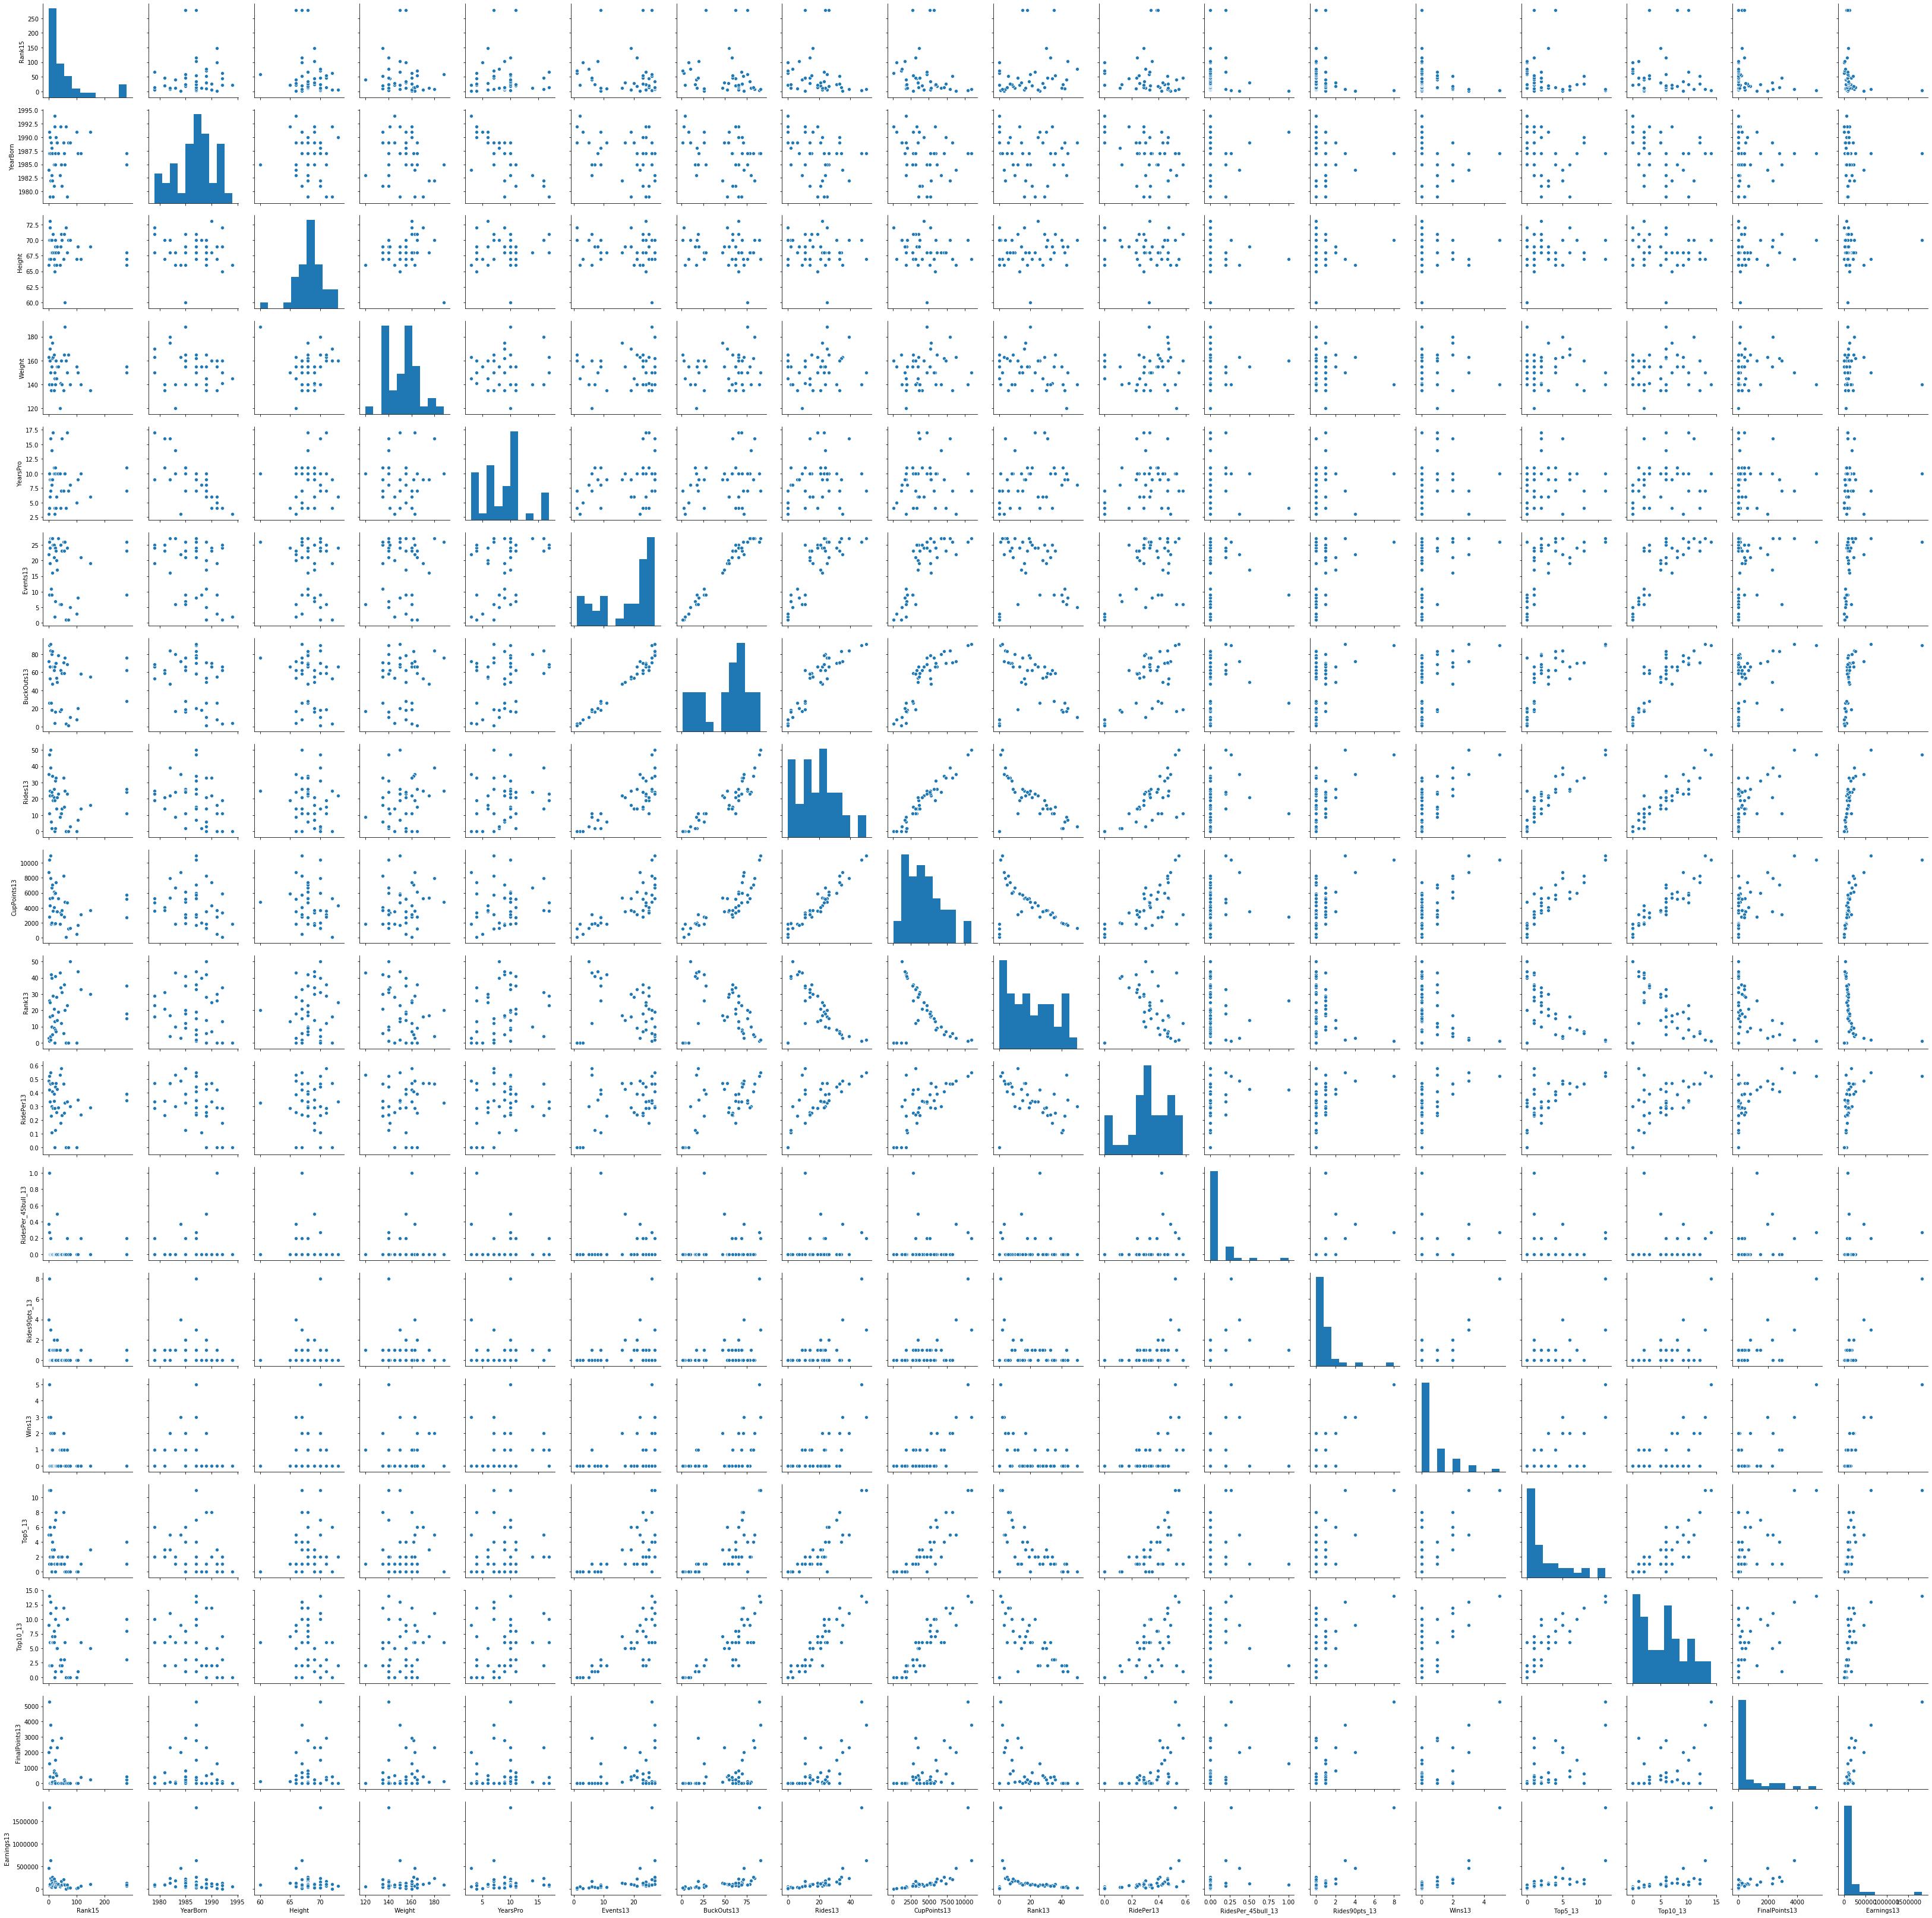

In [16]:
sns.pairplot(Bu_Riders2)

### HISTOGRAM FOR THE  DISTRIBUTION

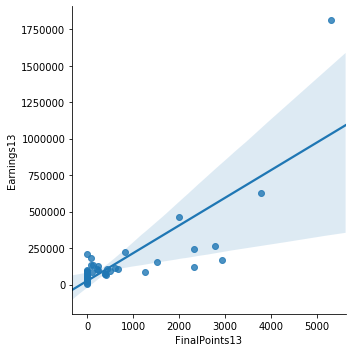

In [17]:
sns.lmplot(data=Bu_Riders2, x= 'FinalPoints13', y='Earnings13' )

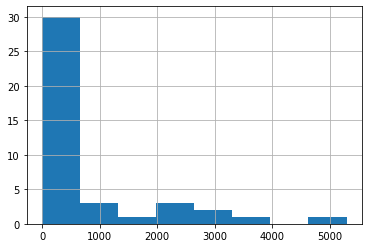

In [18]:
Bu_Riders2['FinalPoints13'].hist(bins=8)

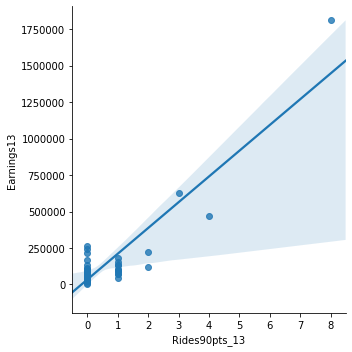

In [19]:
sns.lmplot(data=Bu_Riders2, x= 'Rides90pts_13', y='Earnings13' )

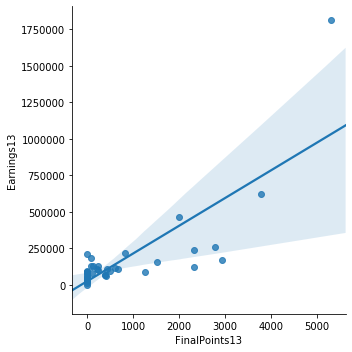

In [20]:
sns.lmplot(data=Bu_Riders2, x= 'FinalPoints13', y='Earnings13' )

 The three plots above shows there is an outliers in the data. Hence we remove the outliers from the data.

### REMOVING THE OUTLIERS

In [21]:
Bu_Riders4=Bu_Riders2[Bu_Riders2['Earnings13']<100000.00 ] 

In [22]:
Bu_Riders4

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events13,BuckOuts13,Rides13,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13,Top10_13,FinalPoints13,Earnings13
1,Matt Triplett,2,USA,1991,67,160,4,9,26,11,2827.43,26,0.4231,1.0,1,0,1,2,1257.25,89377.51
4,Nathan Schaper,5,USA,1990,73,160,6,24,66,22,4304.41,25,0.3333,0.0,0,0,2,2,0.00,58577.22
8,Reese Cates,9,USA,1989,68,135,9,11,26,6,1863.12,42,0.2308,0.0,0,0,1,2,0.00,32106.37
10,Stetson Lawrence,11,USA,1988,70,155,8,9,18,2,2023.75,40,0.1111,0.0,0,0,0,2,0.00,42469.24
14,Ben Jones,15,AUS,1979,71,163,17,25,66,19,3600.50,29,0.2879,0.0,1,0,2,6,388.50,70115.11
20,Gage Gay,22,USA,1994,66,145,3,2,4,0,1829.08,0,0.0000,0.0,0,0,0,0,0.00,55673.60
22,Kasey Hayes,24,USA,1985,69,140,11,7,16,2,1957.58,41,0.1250,0.0,0,0,0,1,0.00,42781.38
25,Stormy Wing,28,USA,1989,66,145,6,20,54,14,3518.75,28,0.2593,0.0,1,0,1,5,491.25,95950.31
30,Douglas Duncan,35,USA,1987,68,155,10,27,79,23,5224.18,19,0.2911,0.0,0,0,2,9,0.00,98729.74
33,Robson Palermo,40,BRA,1983,66,120,10,6,17,9,1847.50,43,0.5294,0.0,1,1,1,2,0.00,43835.00


In [23]:
Bu_Riders4.describe()

,Rank15,YearBorn,Height,Weight,YearsPro,Events13,BuckOuts13,Rides13,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13,Top10_13,FinalPoints13,Earnings13
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,67.863636,1987.227273,68.227273,150.545455,8.727273,14.181818,38.272727,11.000000,2814.902727,26.272727,0.240650,0.063636,0.272727,0.136364,1.000000,3.272727,138.397727,58178.652727
std,75.686254,4.070004,2.653512,13.605767,4.037701,9.713203,27.809183,8.933618,1533.040426,15.455564,0.148262,0.217224,0.455842,0.351250,1.069045,3.254035,299.530423,29269.328665
min,2.000000,1979.000000,60.000000,120.000000,3.000000,1.000000,1.000000,0.000000,105.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,846.040000
25%,22.500000,1985.000000,67.000000,140.250000,6.000000,6.250000,16.250000,2.250000,1833.685000,19.250000,0.138100,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,34697.087500
50%,45.500000,1987.500000,68.000000,150.000000,8.500000,10.000000,27.000000,11.000000,2785.775000,28.500000,0.273600,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,60673.320000
75%,75.250000,1989.750000,70.000000,158.750000,10.000000,24.000000,65.000000,17.750000,3676.340000,38.750000,0.333300,0.000000,0.750000,0.000000,2.000000,5.750000,79.875000,85701.145000
max,279.000000,1994.000000,73.000000,188.000000,17.000000,27.000000,79.000000,26.000000,5752.390000,50.000000,0.529400,1.000000,1.000000,1.000000,4.000000,10.000000,1257.250000,98729.740000


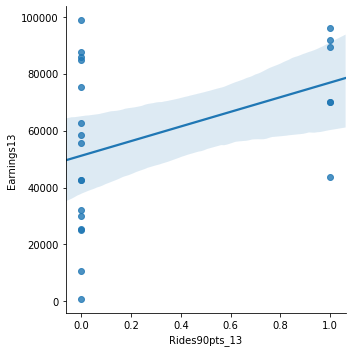

In [24]:
sns.lmplot(data=Bu_Riders4, x= 'Rides90pts_13', y='Earnings13' )

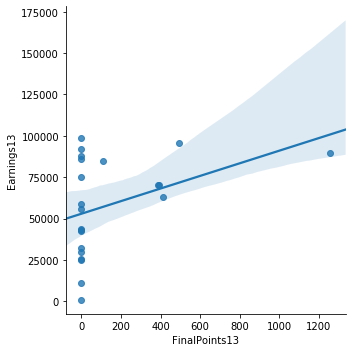

In [25]:
sns.lmplot(data=Bu_Riders4, x= 'FinalPoints13', y='Earnings13' )

### REPORT OF THE LINEAR CORRELATION

The above plot show a positive linear relationship between FinalPoints13 and Earnings13. From the correlation table above, the correlation coefficient between FinalPoints13 and Earnings13 is 0.796521.

The linear relationship between the variables of FinalPoints13 and Earnings13 shows that the earnings of each BullRiders depend on their FinalPoints. The more the points, the more the profits of the competitions would be.
Therefore, the linear relationship between the variables of FinalPoints13 and Earnings13 shows that the earnings of each BullRiders depends on their FinalPoints. The more the points, the more the earnings of the competitions would be.

### LINEAR RELATION OF RIDES13 AND TOP10_13

In [26]:
Ri_Top10= Bu_Riders2[['Rides13', 'Top10_13']]

In [27]:
Ri_Top10.head()

,Rides13,Top10_13
0,35,9
1,11,2
2,47,14
4,22,2
5,25,6


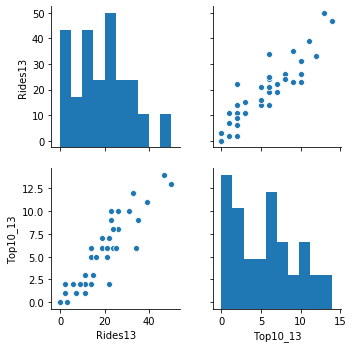

In [28]:
sns.pairplot(data= Ri_Top10)

### FINAL REPORT

The above graph shows a strong positive linear relationship between Rides13 and Top10_13. It means the years of the BullRiders among Top10 positions were determined by staying on top of a bull for 8 seconds of bull riding without being disqualified or disembarked for the bull and their years of experience.


### 2. In 2012, which variable had the strongest linear relationship with Earnings:  Ride Percentage or Cup Points?




Primary Research Question

Analysis
 Let’s break this analysis into the different steps that you will need to take to construct a complete answer.  Be sure to:

1. Create a dataset which contains riders that participated in at least one event in 2012. Call the dataset new_bull12.
2. Make a histogram to visualize the distribution of Earnings for 2012.
3. Generate the appropriate descriptive statistics for this distribution.
4. Make a correlation matrix for Earnings12, RidePer12 and CupPoints12.
5. Plot a scatterplot for Earnings12 with each variable of interest.  Put Earnings12 on the y-axis.  Check for outliers.
6. Determine which variable has the strongest linear relationship with Earnings12.


###  DATASET OF  2012 BULLRIDERS

In [29]:
# 2012 Bullriders Dataset
New_Bull12= B_Riders[['Rider', 'Rank15', 'Country', 'YearBorn', 'Height', 'Weight', 'YearsPro', 'Events12', 'BuckOuts12', 'Rides12', 'CupPoints12', 'Rank12', 'RidePer12', 'Wins12', 'Top5_12', 'Top10_12', 'FinalPoints12', 'Earnings12' 
                    
                ]]

In [30]:
# The dataset
New_Bull12

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events12,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
0,Joao Ricardo Vieira,1,BRA,1984,66,163,3,0,0,0,0.00,0,0.00,0,0,0,0.00,0.00
1,Matt Triplett,2,USA,1991,67,160,4,0,0,0,0.00,0,0.00,0,0,0,0.00,0.00
2,J.B. Mauney,3,USA,1987,70,140,10,26,82,40,9273.25,8,0.49,3,8,13,287.00,313340.27
3,Kaique Pacheco,4,BRA,1994,68,145,2,0,0,0,0.00,0,0.00,0,0,0,0.00,0.00
4,Nathan Schaper,5,USA,1990,73,160,6,0,0,0,0.00,0,0.00,0,0,0,0.00,0.00
5,Valdiron de Oliveira,6,BRA,1979,72,170,9,28,87,53,10608.25,4,0.61,1,10,14,559.50,208724.52
6,Guilherme Marchi,7,BRA,1982,70,180,16,29,87,50,11542.00,2,0.57,2,9,12,2519.75,331421.67
7,Silvano Alves,8,BRA,1987,67,150,7,29,103,62,12201.75,1,0.60,2,8,18,1648.00,1464475.61
8,Reese Cates,9,USA,1989,68,135,9,5,10,3,428.50,53,0.30,0,0,1,0.00,27987.21
9,J.W. Harris,10,USA,1986,70,160,10,0,0,0,0.00,0,0.00,0,0,0,0.00,0.00


In [31]:
#Checking the number of rows and columns in the the dataset
New_Bull12.shape

(58, 18)

In [32]:
# The stastistic description of the dataset
New_Bull12.describe()

,Rank15,YearBorn,Height,Weight,YearsPro,Events12,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01
mean,51.310345,1987.172414,68.637931,153.827586,7.948276,10.396552,30.465517,13.344828,2764.094828,10.568966,0.199310,0.413793,1.982759,3.655172,384.633621,1.006854e+05
std,62.035985,3.987427,2.367160,14.032716,3.752998,11.973567,36.127559,17.866515,3856.021220,15.939702,0.220238,0.726310,3.092103,4.929509,913.584693,2.130289e+05
min,1.000000,1979.000000,60.000000,115.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.250000,1985.000000,67.000000,145.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,32.500000,1987.000000,68.000000,155.000000,7.500000,0.500000,2.000000,0.500000,130.875000,0.500000,0.095000,0.000000,0.000000,0.000000,0.000000,1.067164e+04
75%,61.000000,1990.000000,70.000000,162.750000,10.000000,23.000000,63.500000,27.500000,5007.062500,16.750000,0.380000,1.000000,3.750000,7.000000,182.812500,1.438594e+05
max,279.000000,1994.000000,76.000000,188.000000,17.000000,29.000000,103.000000,62.000000,12201.750000,65.000000,0.610000,3.000000,10.000000,18.000000,4189.250000,1.464476e+06


In [33]:
# Selecting the dataset of bullriders that participate in one event and above. 
New_Bull_Riders = New_Bull12[New_Bull12['Events12'] >0]

In [34]:
New_Bull_Riders

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events12,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
2,J.B. Mauney,3,USA,1987,70,140,10,26,82,40,9273.25,8,0.49,3,8,13,287.00,313340.27
5,Valdiron de Oliveira,6,BRA,1979,72,170,9,28,87,53,10608.25,4,0.61,1,10,14,559.50,208724.52
6,Guilherme Marchi,7,BRA,1982,70,180,16,29,87,50,11542.00,2,0.57,2,9,12,2519.75,331421.67
7,Silvano Alves,8,BRA,1987,67,150,7,29,103,62,12201.75,1,0.60,2,8,18,1648.00,1464475.61
8,Reese Cates,9,USA,1989,68,135,9,5,10,3,428.50,53,0.30,0,0,1,0.00,27987.21
11,Mike Lee,12,USA,1983,68,140,14,20,64,33,6088.00,13,0.52,1,5,7,1011.75,147952.34
12,Fabiano Vieira,13,BRA,1982,68,175,9,23,70,38,7677.25,10,0.54,2,5,11,171.75,191399.08
13,Cody Nance,14,USA,1987,68,162,9,28,76,29,5068.25,16,0.38,1,4,7,322.00,131580.54
14,Ben Jones,15,AUS,1979,71,163,17,19,58,26,4840.75,18,0.45,0,5,7,0.00,115844.10
17,Shane Proctor,19,USA,1985,68,165,10,13,32,8,1387.50,35,0.25,0,0,3,0.00,52443.96


In [35]:
# The shape of the new dataset
New_Bull_Riders.shape

(29, 18)

### HISTOGRAM FOR 2012 EARNINGS

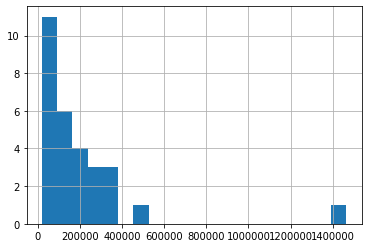

In [36]:
#Histogram of  bullriders 2012 earnings.
New_Bull_Riders['Earnings12'].hist(bins=20) 

In [55]:
New_Bull_Riders.min()

Rider            Austin Meier
Rank15                      3
Country                   AUS
YearBorn                 1979
Height                     60
Weight                    120
YearsPro                    4
Events12                    1
BuckOuts12                  4
Rides12                     1
CupPoints12            261.75
Rank12                      1
RidePer12                0.19
Wins12                      0
Top5_12                     0
Top10_12                    0
FinalPoints12               0
Earnings12            21343.3
dtype: object

This above histogram shows that the amounts many bullriders earns after the game in 2012 is between 21,343.3 and 600,000 dollars.

Secondly, the also shows that of of the bullriders earns more than a million dollar at the end of the game. 

In [37]:
# The maximum amount earns in 2012
New_Bull_Riders['Earnings12'].max()

1464475.61

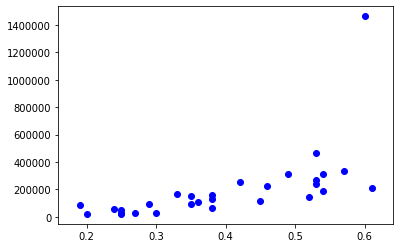

In [38]:
# Plotting a scatter plot to see the linear relationship between Rider12 and Earnings
x = New_Bull_Riders['RidePer12']
y= New_Bull_Riders['Earnings12']
plt.scatter(x, y, color= 'blue') 
  
# To show the plot 
plt.show() 

In [64]:
# New statistics description after removing bullriders that donot parcitipate
New_Bull_Riders.describe() 

,Rank15,YearBorn,Height,Weight,YearsPro,Events12,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01
mean,63.068966,1985.482759,68.000000,150.655172,10.000000,20.793103,60.931034,26.689655,5528.189655,21.137931,0.398621,0.827586,3.965517,7.310345,769.267241,2.013708e+05
std,82.183997,3.670546,2.267787,15.469500,3.412163,8.243523,27.100252,16.761144,3800.350112,16.906728,0.128278,0.848064,3.364550,4.668308,1180.097049,2.671781e+05
min,3.000000,1979.000000,60.000000,120.000000,4.000000,1.000000,4.000000,1.000000,261.750000,1.000000,0.190000,0.000000,0.000000,0.000000,0.000000,2.134328e+04
25%,14.000000,1983.000000,67.000000,140.000000,9.000000,14.000000,38.000000,9.000000,1408.750000,8.000000,0.290000,0.000000,1.000000,3.000000,0.000000,6.681433e+04
50%,28.000000,1987.000000,68.000000,150.000000,10.000000,23.000000,64.000000,28.000000,5062.500000,17.000000,0.380000,1.000000,4.000000,7.000000,186.500000,1.479523e+05
75%,58.000000,1987.000000,69.000000,162.000000,11.000000,28.000000,82.000000,38.000000,9273.250000,34.000000,0.530000,1.000000,5.000000,11.000000,1011.750000,2.399357e+05
max,279.000000,1992.000000,72.000000,188.000000,17.000000,29.000000,103.000000,62.000000,12201.750000,65.000000,0.610000,3.000000,10.000000,18.000000,4189.250000,1.464476e+06


In [65]:
#Extracting earnings12, RiderPer12 and CupPoints12 from the new dataset
New_Bull3= New_Bull_Riders[['Earnings12', 'RidePer12', 'CupPoints12']] 

In [66]:
New_Bull3

,Earnings12,RidePer12,CupPoints12
2,313340.27,0.49,9273.25
5,208724.52,0.61,10608.25
6,331421.67,0.57,11542.00
7,1464475.61,0.60,12201.75
8,27987.21,0.30,428.50
11,147952.34,0.52,6088.00
12,191399.08,0.54,7677.25
13,131580.54,0.38,5068.25
14,115844.10,0.45,4840.75
17,52443.96,0.25,1387.50


In [67]:
#Correlation relationship between Earnings12, RidePer12 and CupPoints.
New_Bull3.corr()

,Earnings12,RidePer12,CupPoints12
Earnings12,1.000000,0.593411,0.656936
RidePer12,0.593411,1.000000,0.918337
CupPoints12,0.656936,0.918337,1.000000


In [68]:
#Description of Earnings12, RidePer12 and CupPoints.
New_Bull3.describe()

,Earnings12,RidePer12,CupPoints12
count,2.900000e+01,29.000000,29.000000
mean,2.013708e+05,0.398621,5528.189655
std,2.671781e+05,0.128278,3800.350112
min,2.134328e+04,0.190000,261.750000
25%,6.681433e+04,0.290000,1408.750000
50%,1.479523e+05,0.380000,5062.500000
75%,2.399357e+05,0.530000,9273.250000
max,1.464476e+06,0.610000,12201.750000


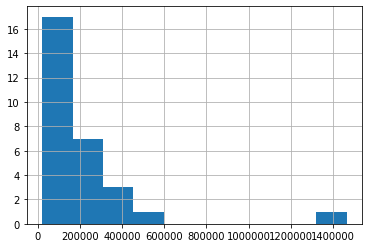

In [69]:
# Plotting the histogram of Earnings12 to see how the data are destributed.
Y_Histo= New_Bull3['Earnings12'].hist(bins=10)

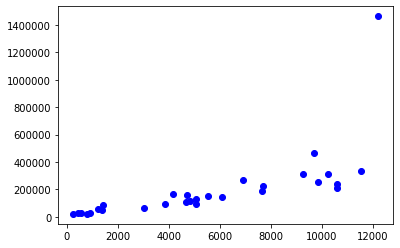

In [71]:
# Scatter plot of CupPoints and Earnings
x = New_Bull3['CupPoints12']
y= New_Bull3['Earnings12']
plt.scatter(x, y, color= 'blue') 
  
 
plt.show() 

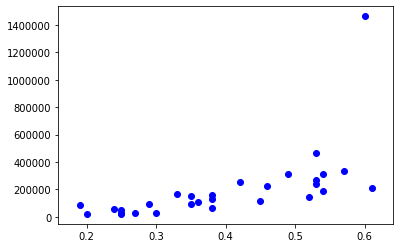

In [72]:
# Scatter plot of RidePer12 and Earnings
x = New_Bull3['RidePer12']
y= New_Bull3['Earnings12']
plt.scatter(x, y, color= 'blue') 
  
# To show the plot 
plt.show()

The two scatter plots above shows there is a present of outlier in the dataset.

### REMOVING THE OUTLIER

In [73]:
#Getting the dataset of bullriders that earns less than 600,000.
New_Bull4= New_Bull3[New_Bull3['Earnings12']< 600000]

In [74]:
New_Bull4

,Earnings12,RidePer12,CupPoints12
2,313340.27,0.49,9273.25
5,208724.52,0.61,10608.25
6,331421.67,0.57,11542.00
8,27987.21,0.30,428.50
11,147952.34,0.52,6088.00
12,191399.08,0.54,7677.25
13,131580.54,0.38,5068.25
14,115844.10,0.45,4840.75
17,52443.96,0.25,1387.50
18,254709.57,0.42,9859.75


In [75]:
#Getting the dataset of bullriders that earns more than 600,000. This indicate the outlier of the data
New_Bull5= New_Bull3[New_Bull3['Earnings12']> 600000]

In [60]:
New_Bull5

,Earnings12,RidePer12,CupPoints12
7,1464475.61,0.6,12201.75


In [63]:
#Correlation matrix after removing the outlier. 
New_Bull4.corr()

,Earnings12,RidePer12,CupPoints12
Earnings12,1.000000,0.803557,0.892921
RidePer12,0.803557,1.000000,0.909788
CupPoints12,0.892921,0.909788,1.000000


In [76]:
#Correlation matrix of the main dataset from above.
New_Bull_Riders.corr()

,Rank15,YearBorn,Height,Weight,YearsPro,Events12,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
Rank15,1.000000,0.137103,-0.188751,-0.038129,-0.093098,-0.277475,-0.290384,-0.298247,-0.255086,0.237829,-0.181130,-0.318036,-0.329607,-0.320561,0.083226,-0.161312
YearBorn,0.137103,1.000000,-0.248850,-0.302647,-0.812693,0.016402,0.006091,-0.127511,-0.156871,0.108811,-0.237465,-0.018199,-0.108496,-0.065331,-0.187379,0.030628
Height,-0.188751,-0.248850,1.000000,-0.075335,0.290771,0.057312,0.109251,0.208588,0.215741,-0.141587,0.165738,0.055710,0.337012,0.182169,-0.030954,-0.024435
Weight,-0.038129,-0.302647,-0.075335,1.000000,0.198246,0.229911,0.183868,0.216927,0.094949,-0.156440,0.206364,0.136866,0.110925,0.140008,-0.206409,-0.040535
YearsPro,-0.093098,-0.812693,0.290771,0.198246,1.000000,-0.167600,-0.177663,-0.086176,-0.070214,0.115150,-0.004896,-0.098736,-0.055996,-0.154704,0.025016,-0.179345
Events12,-0.277475,0.016402,0.057312,0.229911,-0.167600,1.000000,0.980072,0.849657,0.780766,-0.891550,0.627910,0.571985,0.777482,0.840682,0.267326,0.407082
BuckOuts12,-0.290384,0.006091,0.109251,0.183868,-0.177663,0.980072,1.000000,0.923568,0.865032,-0.926399,0.726820,0.619495,0.844455,0.915106,0.347967,0.525712
Rides12,-0.298247,-0.127511,0.208588,0.216927,-0.086176,0.849657,0.923568,1.000000,0.962350,-0.915462,0.905906,0.704632,0.936458,0.962983,0.466177,0.657582
CupPoints12,-0.255086,-0.156871,0.215741,0.094949,-0.070214,0.780766,0.865032,0.962350,1.000000,-0.922791,0.918337,0.738475,0.924024,0.934513,0.653259,0.656936
Rank12,0.237829,0.108811,-0.141587,-0.156440,0.115150,-0.891550,-0.926399,-0.915462,-0.922791,1.000000,-0.844534,-0.663349,-0.858811,-0.885208,-0.550190,-0.535269


### FINAL REPORT

The correlation table shows a strong positive linear relationship between CupPoints12 and the 2012 bull riders' earnings, which is 0.65693 compared to RidePer12 with a positive linear correlation of 0.593411.

The data shows that  29 bull riders didn't participate in any of the events in 2012.

The average earnings of 2012 bull riders are 147,952.3. The minimum amount that was earned in 2012 was 21,343.3.

One of the bull riders earned 1,464,475.61, which is the most massive amount achieved in 2012. 
There is an indication of an outlier dataset. 

After the outlier has been removed, the relationship of CupPoints12 and the Earnings12 is 0.892921, and RidePer12 and Earnings are now 0.803557. Despite removing the outlier, the linear relationship of CupPoints12 and Earnings12 is still more significant than that of RidePer12 and Earnings12.


